<a href="https://colab.research.google.com/github/shadiyahamza/assignment/blob/main/Fish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath='/content/fish.csv'

df_fish = pd.read_csv(filepath, header=None)
df_fish.head(3)

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1


In [ ]:
df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       85 non-null     object 
 1   1       85 non-null     float64
 2   2       85 non-null     float64
 3   3       85 non-null     float64
 4   4       85 non-null     float64
 5   5       85 non-null     float64
 6   6       85 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.8+ KB


In [ ]:
df_fish.describe()

,1,2,3,4,5,6
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,431.758824,27.338824,29.557647,33.120000,28.076471,12.865882
std,380.933962,11.289450,12.185045,13.197292,10.351543,2.117476
min,0.000000,9.300000,9.800000,10.800000,14.500000,8.700000
25%,120.000000,19.400000,21.000000,23.700000,16.900000,11.000000
50%,390.000000,28.400000,30.700000,35.000000,27.100000,13.700000
75%,650.000000,32.700000,36.000000,40.600000,39.200000,14.700000
max,1650.000000,59.000000,63.400000,68.000000,44.500000,16.100000


In [ ]:
df_fish.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0


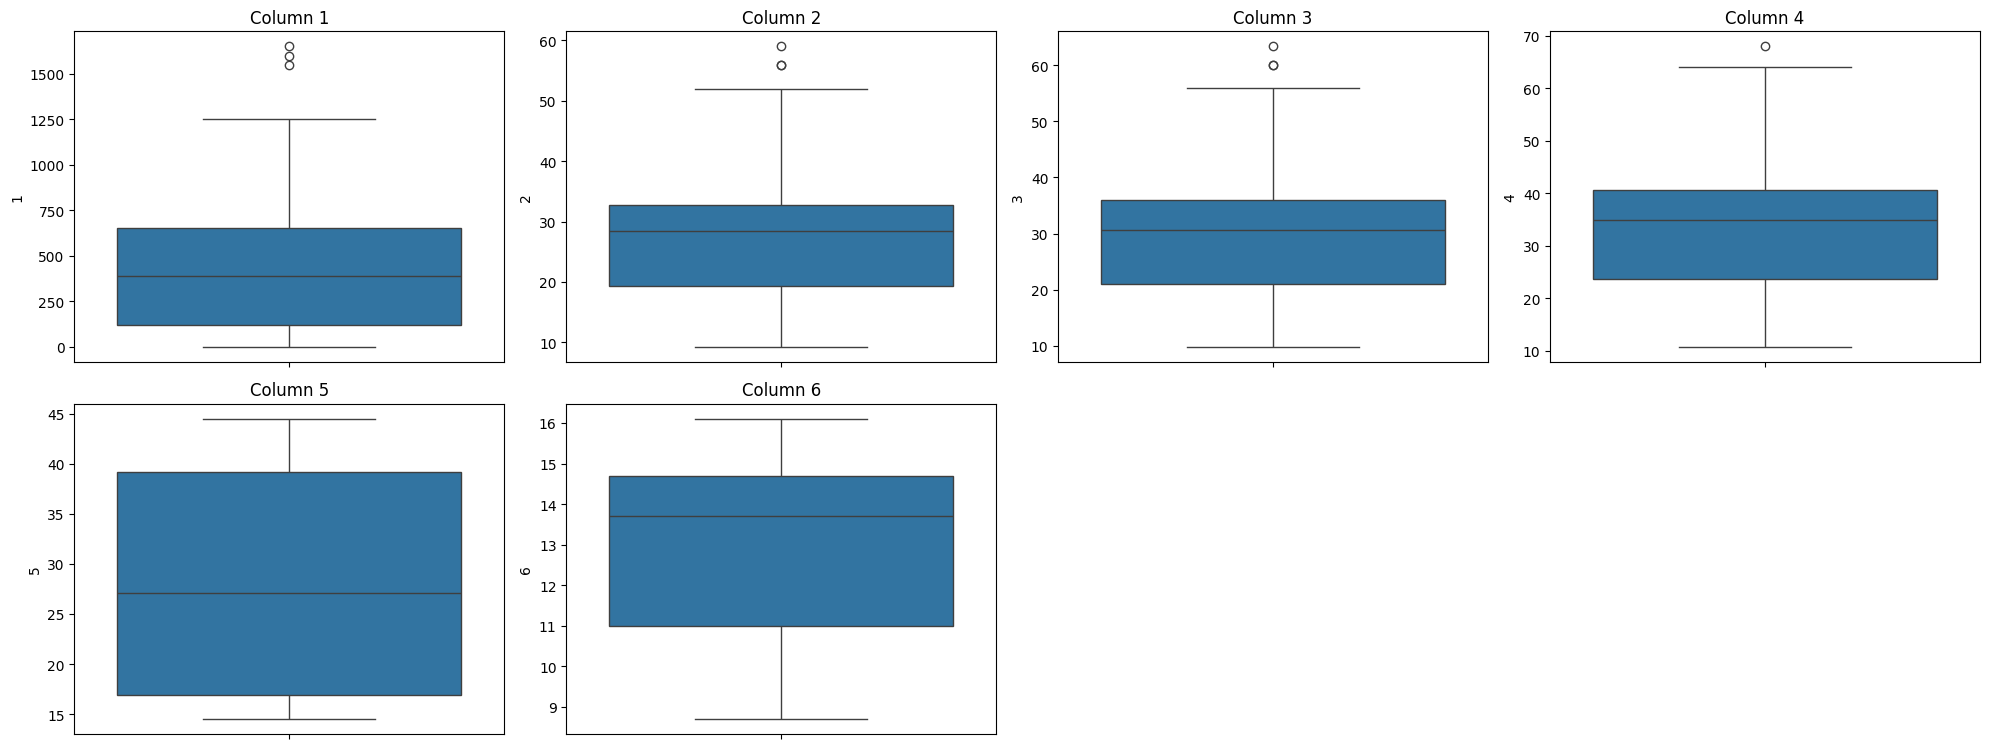

In [ ]:
plt.figure(figsize=(20, 15))
num_cols = [1, 2, 3, 4, 5, 6]
for i, col_index in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df_fish[col_index])
    plt.title(f'Column {col_index}')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate IQR and outlier limits for the specified column
Q=[1, 2, 3, 4]
Q1 = df_fish[Q].quantile(0.25)
Q3 = df_fish[Q].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - 1.5 * IQR
up_limit = Q3 + 1.5 * IQR
print(Q1,Q3,IQR,low_limit,up_limit)

1    120.0
2     19.4
3     21.0
4     23.7
Name: 0.25, dtype: float64 1    650.0
2     32.7
3     36.0
4     40.6
Name: 0.75, dtype: float64 1    530.0
2     13.3
3     15.0
4     16.9
dtype: float64 1   -675.00
2     -0.55
3     -1.50
4     -1.65
dtype: float64 1    1445.00
2      52.65
3      58.50
4      65.95
dtype: float64


In [ ]:
non_outliers = ~((df_fish[Q] < low_limit) | (df_fish[Q] > up_limit)).any(axis=1)
df_fish_new=df_fish[non_outliers]

In [ ]:
df_fish.shape

(85, 7)

In [ ]:
df_fish_new.shape

(82, 7)

In [ ]:
minmax_scaler = MinMaxScaler()
# Assuming columns 1 to 6 are the numerical columns to scale
df_fish_new.iloc[:, 1:7] = minmax_scaler.fit_transform(df_fish_new.iloc[:, 1:7])
df_fish_new.head()

,0,1,2,3,4,5,6
0,Bream,0.1936,0.325527,0.337662,0.392638,0.796667,0.635135
1,Bream,0.2320,0.344262,0.357143,0.417178,0.850000,0.689189
2,Bream,0.2720,0.341920,0.361472,0.415133,0.843333,0.864865
3,Bream,0.2904,0.398126,0.415584,0.464213,0.783333,0.621622
4,Bream,0.3440,0.402810,0.415584,0.474438,0.736667,0.864865


In [ ]:
# Perform one-hot encoding on the first column (index 0)
df_fish_encoded = pd.get_dummies(df_fish_new, columns=[0], prefix='species')

# Display the first few rows of the encoded DataFrame
display(df_fish_encoded.head())

,1,2,3,4,5,6,species_Bream,species_Pike,species_Roach,species_Smelt
0,0.1936,0.325527,0.337662,0.392638,0.796667,0.635135,True,False,False,False
1,0.2320,0.344262,0.357143,0.417178,0.850000,0.689189,True,False,False,False
2,0.2720,0.341920,0.361472,0.415133,0.843333,0.864865,True,False,False,False
3,0.2904,0.398126,0.415584,0.464213,0.783333,0.621622,True,False,False,False
4,0.3440,0.402810,0.415584,0.474438,0.736667,0.864865,True,False,False,False


In [ ]:
species_cols = ['species_Bream', 'species_Pike', 'species_Roach', 'species_Smelt']
df_fish_encoded[species_cols] = df_fish_encoded[species_cols].astype(int)

# Check results
print(df_fish_encoded[species_cols].head())

   species_Bream  species_Pike  species_Roach  species_Smelt
0              1             0              0              0
1              1             0              0              0
2              1             0              0              0
3              1             0              0              0
4              1             0              0              0


In [ ]:
df_fish_encoded

,1,2,3,4,5,6,species_Bream,species_Pike,species_Roach,species_Smelt
0,0.1936,0.325527,0.337662,0.392638,0.796667,0.635135,1,0,0,0
1,0.2320,0.344262,0.357143,0.417178,0.850000,0.689189,1,0,0,0
2,0.2720,0.341920,0.361472,0.415133,0.843333,0.864865,1,0,0,0
3,0.2904,0.398126,0.415584,0.464213,0.783333,0.621622,1,0,0,0
4,0.3440,0.402810,0.415584,0.474438,0.736667,0.864865,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
77,0.4000,0.765808,0.761905,0.760736,0.000000,0.202703,0,1,0,0
78,0.4536,0.793911,0.783550,0.775051,0.050000,0.175676,0,1,0,0
79,0.6160,0.831382,0.826840,0.826176,0.016667,0.243243,0,1,0,0
80,0.7600,0.913349,0.906926,0.905930,0.056667,0.337838,0,1,0,0


K-means


In [ ]:
X = df_fish_new.iloc[:, [1,6]].values

In [ ]:
WCSS=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(X)
  WCSS.append(kmeans.inertia_)

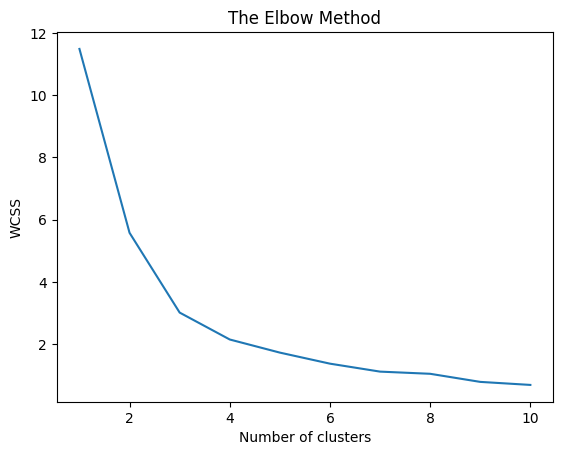

In [ ]:
plt.plot(range(1,11), WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
df_fish_new['Cluster']=y_kmeans
df_fish_new.head()

/tmp/ipython-input-51301294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fish_new['Cluster']=y_kmeans


,0,1,2,3,4,5,6,Cluster
0,Bream,0.1936,0.325527,0.337662,0.392638,0.796667,0.635135,2
1,Bream,0.2320,0.344262,0.357143,0.417178,0.850000,0.689189,2
2,Bream,0.2720,0.341920,0.361472,0.415133,0.843333,0.864865,2
3,Bream,0.2904,0.398126,0.415584,0.464213,0.783333,0.621622,2
4,Bream,0.3440,0.402810,0.415584,0.474438,0.736667,0.864865,2


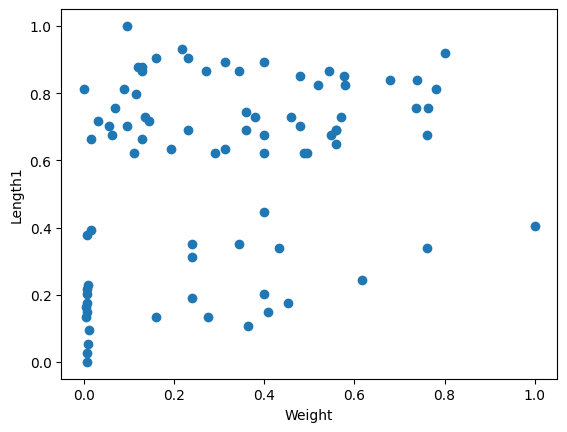

In [ ]:
#before clustering
plt.scatter(df_fish_new[1],df_fish_new[6])
plt.xlabel('Weight')
plt.ylabel('Length1')
plt.show()

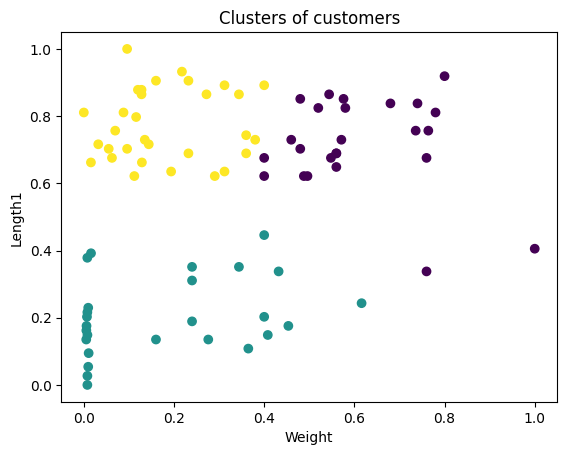

In [ ]:
#after clustering
plt.scatter(df_fish_new[1],df_fish_new[6], c= df_fish_new['Cluster'])
plt.title('Clusters of customers')
plt.xlabel('Weight')
plt.ylabel('Length1')
plt.show()

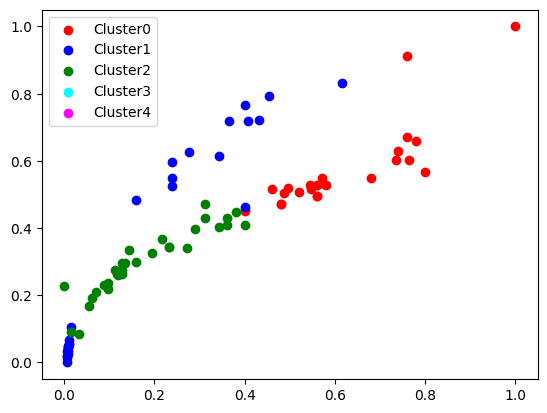

In [ ]:
colors= ['red','blue','green','cyan','magenta']
for i in range(5):
  cluster_data= df_fish_new[y_kmeans==i]
  plt.scatter(df_fish_new[df_fish_new['Cluster']==i][1],
              df_fish_new[df_fish_new['Cluster']==i][2],
              c=colors[i],label=f'Cluster{i}')
plt.legend()


In [ ]:
#predict the cluster
def predict_cluster(features):
  # Scale the input data using the fitted scaler
  scaled_data = minmax_scaler.transform([features])
  # Select only the features used for KMeans training (columns 1 and 6 of the original data)
  kmeans_features = scaled_data[:, [0, 5]]
  cluster = kmeans.predict(kmeans_features)
  return cluster[0]

In [ ]:
# Make sure to pass all 6 features to the predict_cluster function
predicted_cluster = predict_cluster([50, 15, 20, 25, 30, 10])
print("the values belong to the cluster",predicted_cluster)

the values belong to the cluster 1


Agglomerative Hierarchical Clustering


In [ ]:
# Use the one-hot encoded DataFrame for hierarchical clustering
ag_cluster = linkage(df_fish_encoded, method='ward')

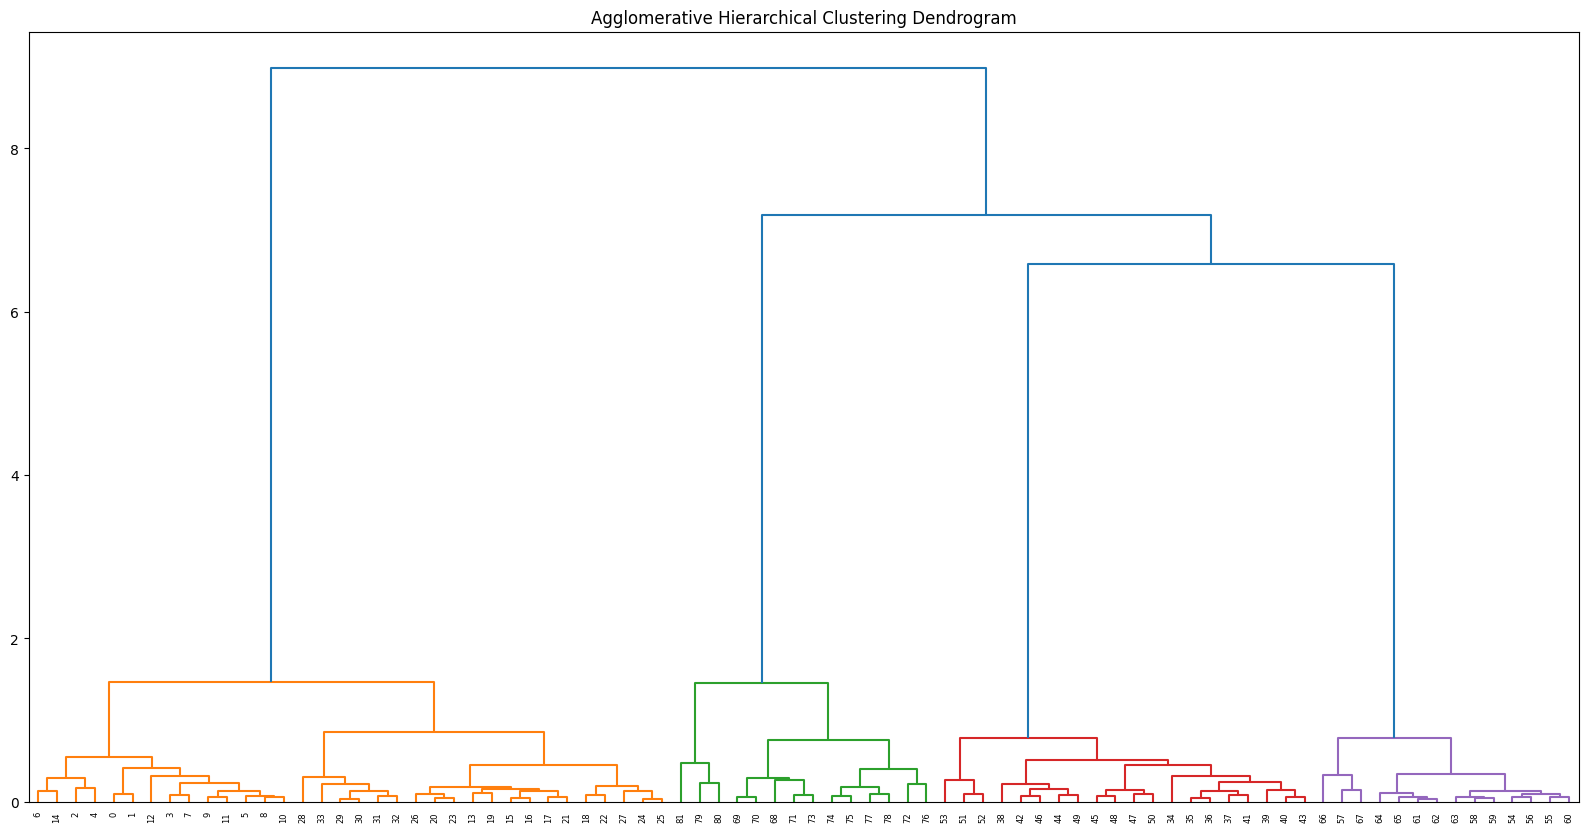

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.axhline(y=200, color='y',linestyle='--')
dendrogram(ag_cluster)
plt.show()

In [ ]:
cluster_labels=fcluster(ag_cluster, t=200, criterion='distance')
df_fish_new['cluster_agglomerative']= cluster_labels
df_fish_new.head()

/tmp/ipython-input-1609651599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fish_new['cluster_agglomerative']= cluster_labels


,0,1,2,3,4,5,6,Cluster,cluster_agglomerative
0,Bream,0.1936,0.325527,0.337662,0.392638,0.796667,0.635135,2,1
1,Bream,0.2320,0.344262,0.357143,0.417178,0.850000,0.689189,2,1
2,Bream,0.2720,0.341920,0.361472,0.415133,0.843333,0.864865,2,1
3,Bream,0.2904,0.398126,0.415584,0.464213,0.783333,0.621622,2,1
4,Bream,0.3440,0.402810,0.415584,0.474438,0.736667,0.864865,2,1


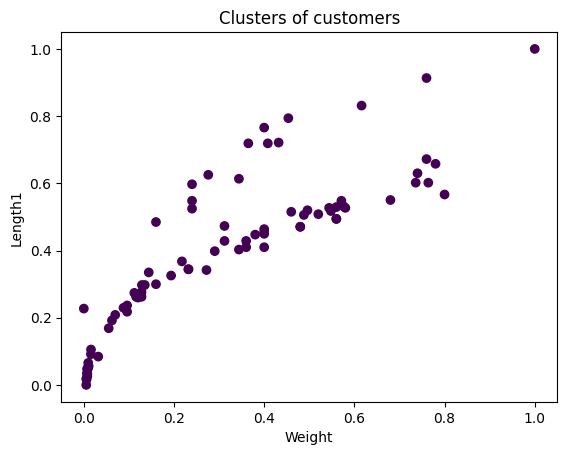

In [ ]:
#after clustering
plt.scatter(df_fish_new[1],[df_fish_new[2]], c= df_fish_new['cluster_agglomerative'])
plt.title('Clusters of customers')
plt.xlabel('Weight')
plt.ylabel('Length1')
plt.show()

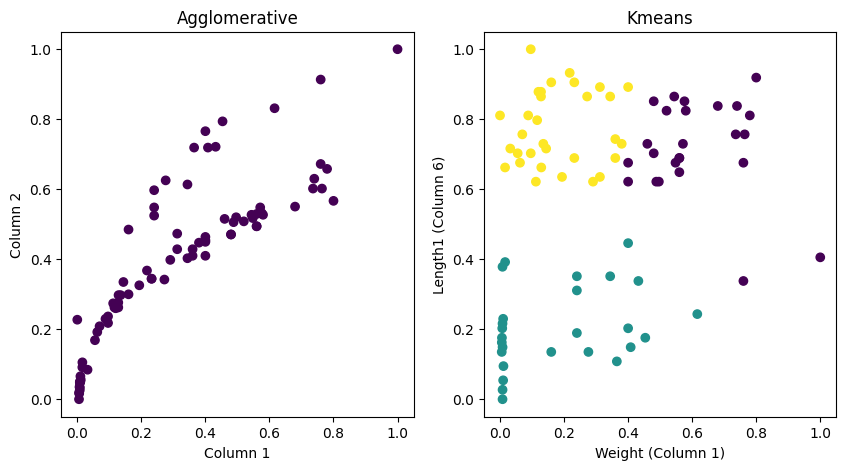

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(df_fish_new[1],df_fish_new[2], c= df_fish_new['cluster_agglomerative'])
plt.title('Agglomerative')
plt.xlabel('Column 1')
plt.ylabel('Column 2')

plt.subplot(1,2,2)
plt.scatter(df_fish_new[1],df_fish_new[6], c= df_fish_new['Cluster'])
plt.title('Kmeans')
plt.xlabel('Weight (Column 1)')
plt.ylabel('Length1 (Column 6)')
plt.show()